<a href="https://colab.research.google.com/github/Utsuk7/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="/content/spam.csv"
import chardet
with open(url, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df= pd.read_csv(url,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [8]:
df.sample(10)

,target,text
396,ham,Was actually sleeping and still might when u c...
1234,ham,\Hello-/@drivby-:0quit edrunk sorry iff pthis ...
4245,ham,Well welp is sort of a semiobscure internet thing
878,spam,U have a secret admirer who is looking 2 make ...
4116,ham,Sure thing big man. i have hockey elections at...
1536,ham,How's it feel? Mr. Your not my real Valentine ...
4539,ham,"Urgh, coach hot, smells of chip fat! Thanks ag..."
5072,ham,Gud ni8 dear..slp well..take care..swt dreams....
3161,ham,I can't describe how lucky you are that I'm ac...
722,ham,That is wondar full flim.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()

In [10]:
df['target']=encoding.fit_transform(df['target'])

In [11]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Mandatory Steps

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

# EDA

In [16]:
# check percentage of data which is spam and ham respectively
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

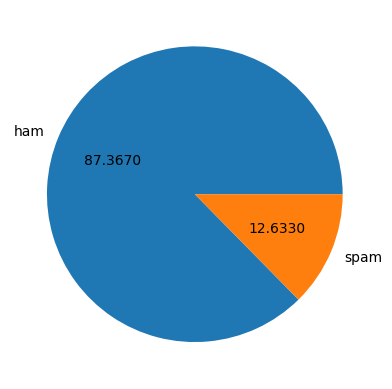

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.4f")
plt.show() #data is imbalance

In [18]:
import nltk

In [19]:
df['len_characters']=df['text'].apply(len)
df.head()

,target,text,len_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['len_word']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,text,len_characters,len_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df[['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='len_characters', ylabel='Count'>

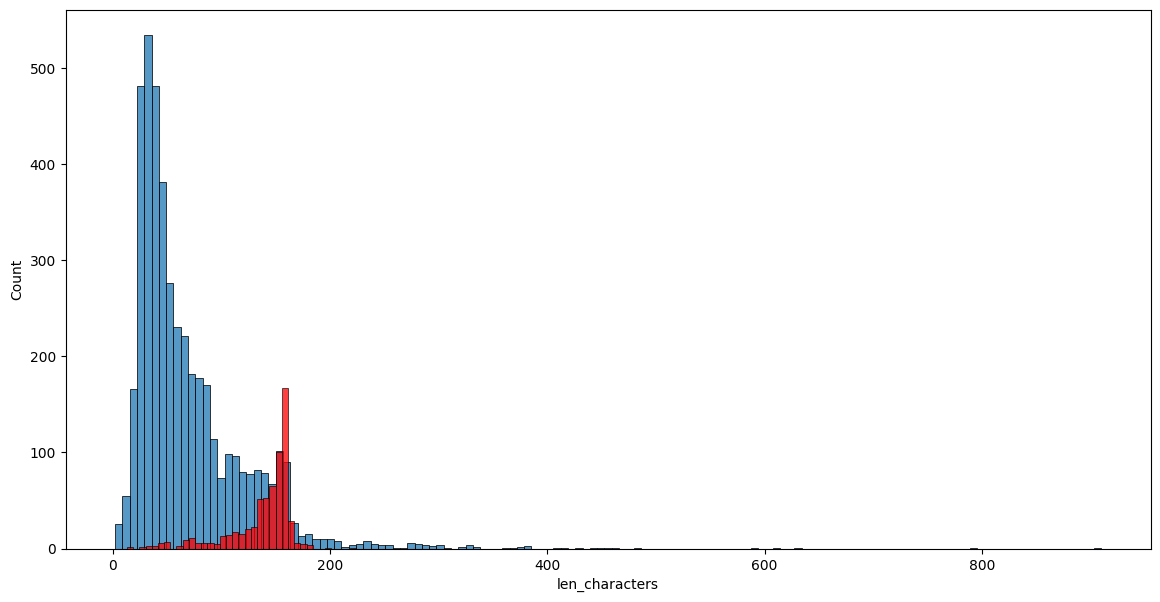

In [27]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_characters'])
sns.histplot(df[df['target']==1]['len_characters'],color='r')

<Axes: xlabel='len_word', ylabel='Count'>

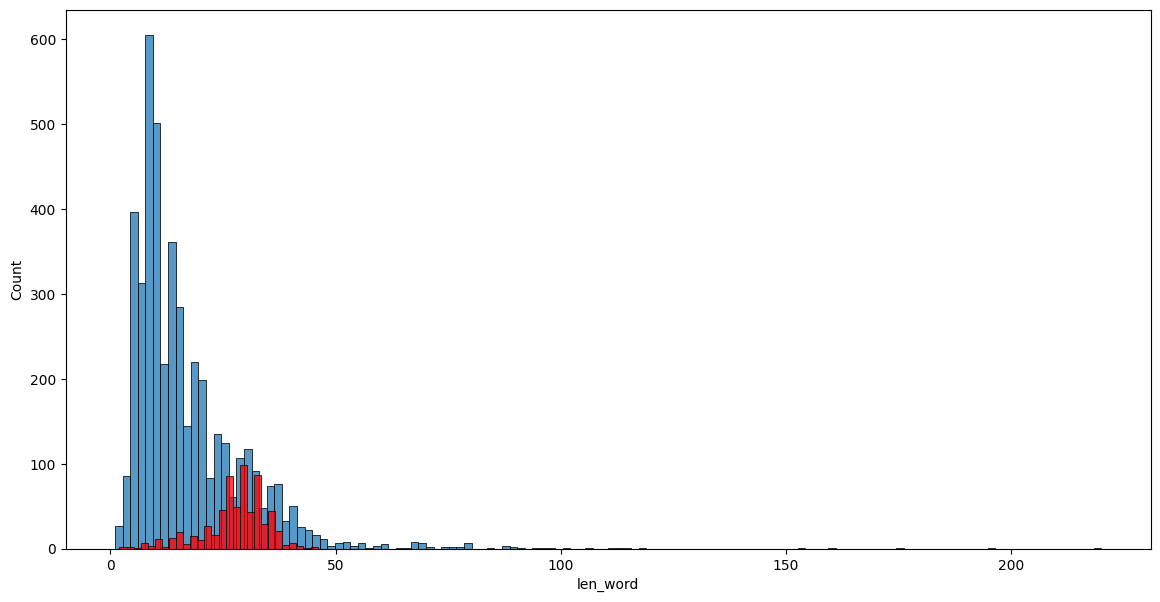

In [28]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_word'])
sns.histplot(df[df['target']==1]['len_word'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

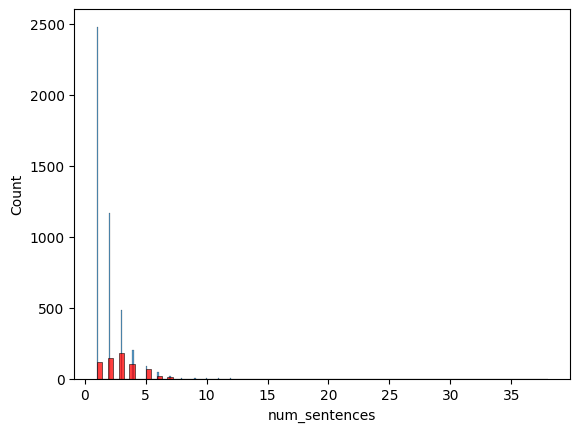

In [29]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='r')

<ipython-input-30-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

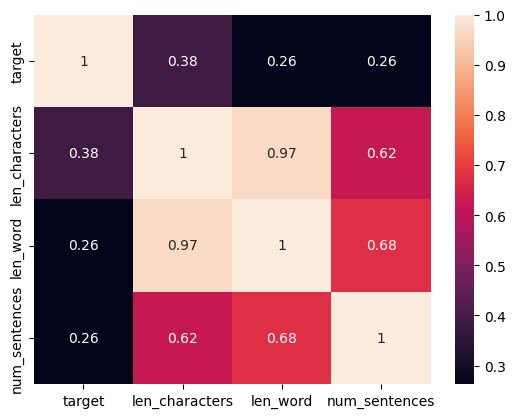

In [30]:
sns.heatmap(df.corr(),annot=True)

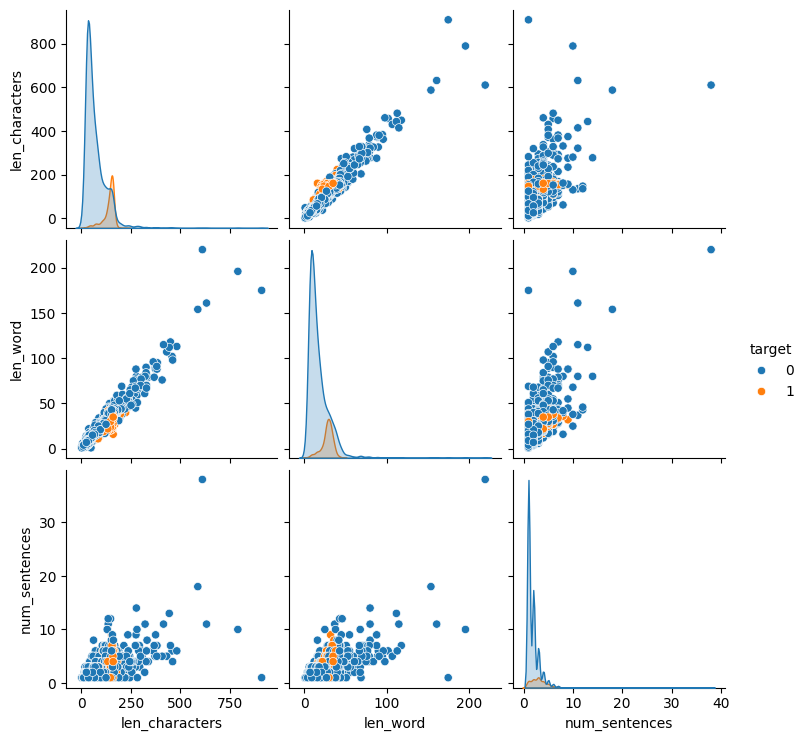

In [31]:
sns.pairplot(df,hue='target')
plt.show()

#Preprocessing

In [32]:
'''
lower case
tokenisation
special characters
removing stop words and punctuation
stemming
'''

'\nlower case\ntokenisation\nspecial characters\nremoving stop words and punctuation\nstemming\n'

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
ps=PorterStemmer()
#ps.stem("playing")

In [35]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  ans=[]

  for i in text:
    if i.isalnum():
      ans.append(i)

  text=ans[:]
  ans.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      ans.append(i)

  text=ans[:]
  ans.clear()
  for i in text:
    ans.append(ps.stem(i))

  return " ".join(ans)


In [36]:
#transform_text("I love playing football. i play center forward")

In [37]:
df['preprocessed_text']=df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,len_characters,len_word,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [40]:
# extracting most frequent words from spam messages
spam_wc=wc.generate(df[df['target']==1]['preprocessed_text'].str.cat(sep=' '))

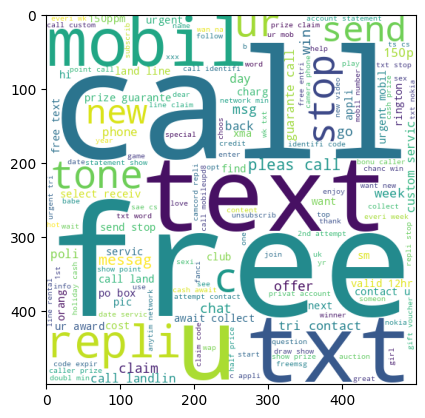

In [41]:
plt.imshow(spam_wc)

In [42]:
# extracting most frequent words from ham message
ham_wc=wc.generate(df[df['target']==0]['preprocessed_text'].str.cat(sep=" "))

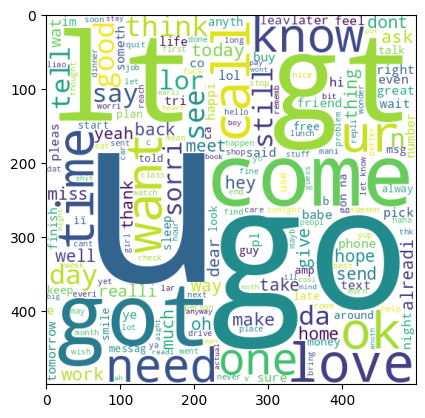

In [43]:
plt.imshow(ham_wc)

In [44]:
# count of top 30 most repeated words
freq_spam=[]
for msg in df[df['target']==1]['preprocessed_text'].to_list():
  for word in msg.split():
      freq_spam.append(word)


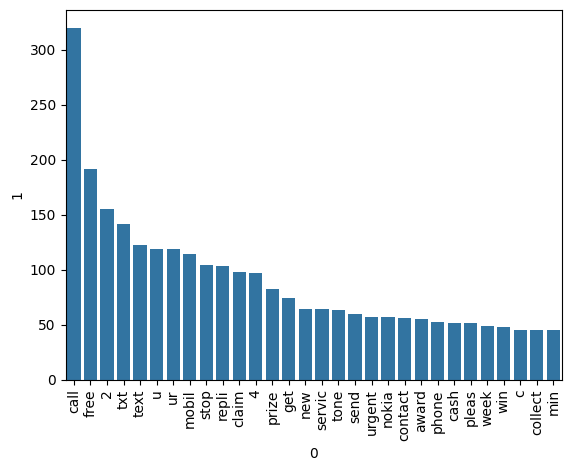

In [45]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(freq_spam).most_common(30)),x=pd.DataFrame(Counter(freq_spam).most_common(30))[0],y=pd.DataFrame(Counter(freq_spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# count of top 30 most repeated words from ham

freq_ham=[]
for msg in df[df['target']==0]['preprocessed_text'].to_list():
  for word in msg.split():
      freq_ham.append(word)


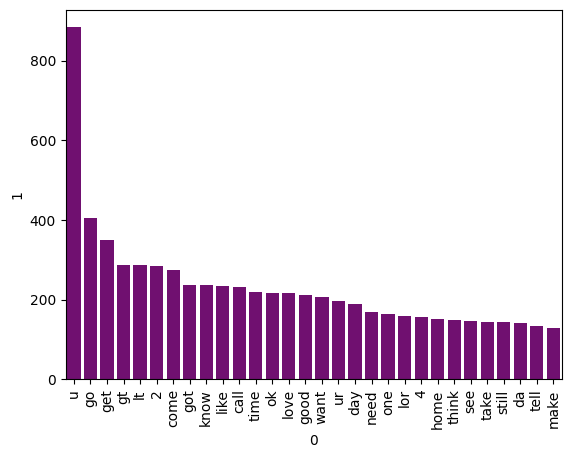

In [47]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(freq_ham).most_common(30)),x=pd.DataFrame(Counter(freq_ham).most_common(30))[0],y=pd.DataFrame(Counter(freq_ham).most_common(30))[1],color='purple')
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df.head()

,target,text,len_characters,len_word,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [50]:
X=cv.fit_transform(df['preprocessed_text']).toarray()

In [51]:
X.shape

(5169, 6708)

In [52]:
y=df['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [58]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [59]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [60]:
#TfidVectorisation
tfid=TfidfVectorizer()

In [61]:
X=tfid.fit_transform(df['preprocessed_text']).toarray()

In [62]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [66]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [68]:
#tfid ---->mnb

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [70]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bgc=BaggingClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [71]:
column={
    'SVC':svc,
    'LRC':lrc,
    'KNC':knc,
    'MNB':mnb,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'BGC':bgc,
    'GBC':gbc,
    'ETC':etc,
    'XBG':xgb
}

In [72]:
def train_performance(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_pred=algo.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [73]:
accuracy_array=[]
precision_array=[]

for names,algo in column.items():
  accuracy,precision=train_performance(algo,X_train,y_train,X_test,y_test)
  print(names)
  print(accuracy)
  print(precision)

  accuracy_array.append(accuracy)
  precision_array.append(precision)

SVC
0.9729206963249516
0.9741379310344828
LRC
0.9516441005802708
0.94
KNC
0.9003868471953579
1.0
MNB
0.9593810444874274
1.0
DTC
0.9352030947775629
0.8380952380952381
RFC
0.971953578336557
1.0
ABC
0.9613152804642167
0.9454545454545454
BGC
0.9584139264990329
0.8625954198473282
GBC
0.9526112185686654
0.9238095238095239
ETC
0.9729206963249516
0.9824561403508771
XBG
0.9729206963249516
0.9435483870967742


In [74]:
pred_df=pd.DataFrame({'Algorithms':column.keys(),'Accuracy':accuracy_array,'Precsion':precision_array})
pred_df

,Algorithms,Accuracy,Precsion
0,SVC,0.972921,0.974138
1,LRC,0.951644,0.940000
2,KNC,0.900387,1.000000
3,MNB,0.959381,1.000000
4,DTC,0.935203,0.838095
5,RFC,0.971954,1.000000
6,ABC,0.961315,0.945455
7,BGC,0.958414,0.862595
8,GBC,0.952611,0.923810
9,ETC,0.972921,0.982456
